In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [26]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [27]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Conv2DTranspose,Activation,BatchNormalization,Dropout,Flatten,Reshape,Input,LeakyReLU
from keras.utils import to_categorical

In [28]:
training_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [33]:
img_cols, img_rows,channels = 28,28,1
num_classes = 10

In [34]:
training_data.shape

(42000, 785)

In [35]:
# creating preprocessing function
def preproc(raw):
    y = to_categorical(raw['label'],num_classes)
    tot_img = training_data.shape[0]
    x_native = raw.values[:,1:]
    x_native_recon = x_native.reshape(tot_img,img_rows,img_cols,1)
    x_scaled = x_native_recon/255.0
    return x_scaled,y

In [36]:
# creating datasets with validation_size = 0.3
X_nat,y_nat = preproc(training_data)
X_train,X_test,y_train,y_test = train_test_split(X_nat,y_nat,test_size=0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(29400, 28, 28, 1) (12600, 28, 28, 1) (29400, 10) (12600, 10)


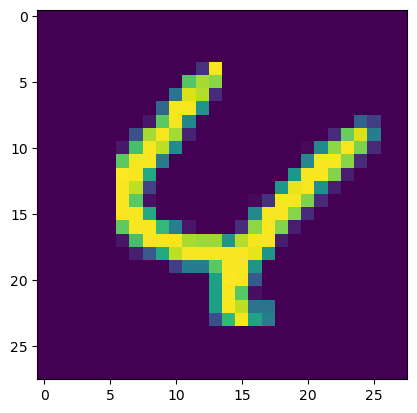

In [37]:
plt.imshow(X_train[0])

In [39]:

from tensorflow.keras import layers

In [45]:
classifier = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [46]:

classifier.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_4 (Flatten)         (None, 1152)             

In [47]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# callback = keras.callbacks.EarlyStopping(monitor='val_loss',
#                               min_delta=0,
#                               patience=0,
#                               verbose=0, mode='auto')
classifier.fit(x=X_train,y=y_train,batch_size=16,epochs=10)

Epoch 1/10
1838/1838 [==============================] - 29s 15ms/step - loss: 0.0652 - accuracy: 0.8821
Epoch 2/10
1838/1838 [==============================] - 27s 15ms/step - loss: 0.0160 - accuracy: 0.9778
Epoch 3/10
1838/1838 [==============================] - 27s 15ms/step - loss: 0.0116 - accuracy: 0.9843
Epoch 4/10
1838/1838 [==============================] - 27s 15ms/step - loss: 0.0094 - accuracy: 0.9869
Epoch 5/10
1838/1838 [==============================] - 27s 15ms/step - loss: 0.0077 - accuracy: 0.9889
Epoch 6/10
1838/1838 [==============================] - 27s 15ms/step - loss: 0.0068 - accuracy: 0.9914
Epoch 7/10
1838/1838 [==============================] - 27s 15ms/step - loss: 0.0057 - accuracy: 0.9918
Epoch 8/10
1838/1838 [==============================] - 27s 15ms/step - loss: 0.0055 - accuracy: 0.9930
Epoch 9/10
1838/1838 [==============================] - 27s 14ms/step - loss: 0.0043 - accuracy: 0.9938
Epoch 10/10
1838/1838 [==============================] - 28s 15m

In [48]:
from sklearn.metrics import accuracy_score
pred_valids = classifier.predict(X_test)

394/394 [==============================] - 4s 9ms/step


In [49]:
pred_val = np.argmax(pred_valids,axis=-1)

In [50]:
accuracy_score(pred_val, np.argmax(y_test, axis=-1))

0.9915079365079366

In [51]:
Test_Data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
tot_img_test = Test_Data.shape[0]
test_native = Test_Data.values[:,:]
test_native_recon = test_native.reshape(tot_img_test,img_rows,img_cols,1)
test_final = test_native_recon/255.0

In [52]:
test_final_preds =  classifier.predict(test_final)
test_preds = np.argmax(test_final_preds,axis=-1)

875/875 [==============================] - 8s 10ms/step


In [53]:
output = pd.DataFrame({'Label': test_preds}).reset_index(drop=True)
output.index += 1
output.to_csv('output.csv', index_label='ImageId')